### ep2-julia

In [1]:
# libraries
using Random
using Distributions
using Plots; gr()

Plots.GRBackend()

In [8]:
# generates artificial linear data
function artificial_linear_data(N)
    X = [range(90, 1200; length=N);]
    gamma = rand(Normal(30, 10), N)
    y = 50 * X + gamma * 400
    (X, y)
end

X, y = artificial_linear_data(100)
size(X), mean(X), std(X), size(y), mean(y), std(y)

((100,), 645.0000000000001, 325.2803645780711, (100,), 44103.39109092316, 16277.979424757155)

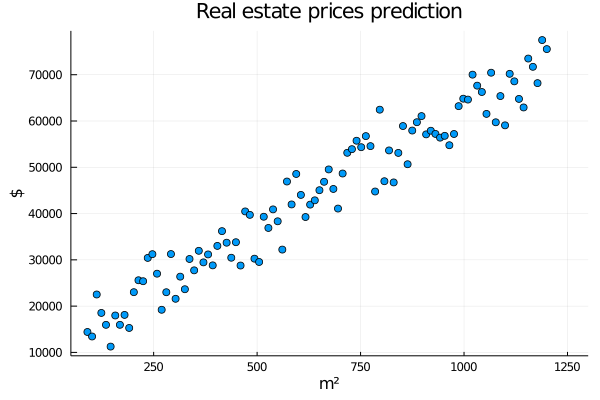

In [3]:
function plot_points_regression(X, y)
    scatter(X, y, 
        title = "Real estate prices prediction",
        xlabel = "m\u00b2",
        xlims = (50, 1300),
        ylabel = "\$",
        yformatter = :plain,
        legend = false)
end

plot_points_regression(X, y)

In [5]:
function normal_equation_weights(X, y)
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    w = inv(X_til' * X_til) * X_til' * y
end

w = normal_equation_weights(X, y)

2-element Array{Float64,1}:
 11058.695640939426
    51.434302456340035